In [22]:
!pip install geocoder
!pip install geopy
!pip install folium
import pandas as pd
import requests
import numpy as np
import geocoder
import folium
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
from bs4 import BeautifulSoup
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page_content = requests.get(url).text
doc = BeautifulSoup(page_content, 'lxml')
table = doc.find('table', attrs = {'class':'wikitable sortable'})
table_data = table.tbody.find_all('tr')

In [3]:
data =[]
ignore = False
for row in table_data:
    rowData = []
    ignore = False
    for cell in row.find_all('td'):
        cellData = cell.text.rstrip("\n")
        if cellData == 'Not assigned':
            ignore = True
            break
        elif cellData == '':
            rowData.append(rowData[-1])
        rowData.append(cellData)
    if not(ignore):
        data.append(rowData)

In [4]:
headers = ['PostalCode','Borough','Neighborhood']
df=pd.DataFrame(data,columns=headers)
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df

,PostalCode,Borough,Neighborhood
1,M3A,North York,Parkwoods
2,M4A,North York,Victoria Village
3,M5A,Downtown Toronto,"Regent Park, Harbourfront"
4,M6A,North York,"Lawrence Manor, Lawrence Heights"
5,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
99,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
100,M4Y,Downtown Toronto,Church and Wellesley
101,M7Y,East Toronto,Business reply mail Processing Centre
102,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [14]:
def get_latlng(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords

In [19]:
coords = [ get_latlng(postal_code) for postal_code in df['PostalCode'].tolist() ]
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']

In [20]:
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
1,M3A,North York,Parkwoods,43.728102,-79.311890
2,M4A,North York,Victoria Village,43.650964,-79.353041
3,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.723265,-79.451211
4,M6A,North York,"Lawrence Manor, Lawrence Heights",43.661790,-79.389390
5,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.667481,-79.528953
...,...,...,...,...,...
99,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.666659,-79.381472
100,M4Y,Downtown Toronto,Church and Wellesley,43.648700,-79.385450
101,M7Y,East Toronto,Business reply mail Processing Centre,43.632798,-79.493017
102,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.625490,-79.526000


In [28]:
df.shape[0] - df.dropna().shape[0]

1

In [31]:
df.set_value(103,'Latitude', 43.6288408)
df.set_value(103,'Longitude', -79.5209994)

C:\Users\z021470\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
C:\Users\z021470\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,PostalCode,Borough,Neighborhood,Latitude,Longitude
1,M3A,North York,Parkwoods,43.728102,-79.311890
2,M4A,North York,Victoria Village,43.650964,-79.353041
3,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.723265,-79.451211
4,M6A,North York,"Lawrence Manor, Lawrence Heights",43.661790,-79.389390
5,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.667481,-79.528953
...,...,...,...,...,...
99,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.666659,-79.381472
100,M4Y,Downtown Toronto,Church and Wellesley,43.648700,-79.385450
101,M7Y,East Toronto,Business reply mail Processing Centre,43.632798,-79.493017
102,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.625490,-79.526000


In [23]:
from geopy.geocoders import Nominatim

address = 'Scarborough,Toronto'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude

C:\Users\z021470\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """


In [32]:
map_Scarborough = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

for lat, lng, nei in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='aqua',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Scarborough)  
    
map_Scarborough

In [33]:
CLIENT_ID = '3JEP3TZZBQQGZIUEWKZ0D0BTQXNISR3EJLBOFJEMBSZHA5IO'
CLIENT_SECRET = 'C24UN30PFSBIFTNJR2LA0Y1XG443C3TOK1FVMB3LR031T33K'
VERSION = '20200516'
LIMIT = 100
radius = 500

In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        url = ("https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}"
            "&radius={}&limit={}").format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']

        for venue in results:
            venues.append((
                name, 
                lat, 
                lng, 
                venue['venue']['name'], 
                venue['venue']['location']['lat'], 
                venue['venue']['location']['lng'],  
                venue['venue']['categories'][0]['name']))
   
    return(venues)

In [36]:
neraby_venues = getNearbyVenues(df['Neighborhood'],df['Latitude'],df['Longitude'])
df_nearby_venues = pd.DataFrame(neraby_venues)
df_nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
df_nearby_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.728102,-79.311890,Tim Hortons,43.725517,-79.313103,Coffee Shop
1,Parkwoods,43.728102,-79.311890,Portugril,43.725819,-79.312785,Portuguese Restaurant
2,Parkwoods,43.728102,-79.311890,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,-79.313620,Intersection
3,Parkwoods,43.728102,-79.311890,Pizza Nova,43.725824,-79.312860,Pizza Place
4,Parkwoods,43.728102,-79.311890,Wigmore Park,43.731023,-79.310771,Park
...,...,...,...,...,...,...,...
2266,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,RONA,43.629393,-79.518320,Hardware Store
2267,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,7-Eleven,43.629107,-79.517431,Convenience Store
2268,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Jim & Maria's No Frills,43.631152,-79.518617,Grocery Store
2269,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Value Village,43.631269,-79.518238,Thrift / Vintage Store


In [137]:
df_nearby_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Accessories Store,1,1,1,1,1,1
Afghan Restaurant,1,1,1,1,1,1
Airport,1,1,1,1,1,1
American Restaurant,31,31,31,31,31,31
Art Gallery,14,14,14,14,14,14
...,...,...,...,...,...,...
Wine Bar,10,10,10,10,10,10
Wine Shop,1,1,1,1,1,1
Wings Joint,3,3,3,3,3,3


In [37]:
df_nearby_venues.describe()

,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude
count,2271.000000,2271.000000,2271.000000,2271.000000
mean,43.673459,-79.394687,43.673569,-79.394782
std,0.042228,0.054867,0.042035,0.054838
min,43.600895,-79.588351,43.597355,-79.589943
25%,43.648283,-79.406456,43.648480,-79.408229
50%,43.651734,-79.385440,43.651569,-79.384103
75%,43.686378,-79.377529,43.684748,-79.378329
max,43.817998,-79.185284,43.821167,-79.182887


In [38]:
df_nearby_venues.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,25,25,25,25,25,25
"Alderwood, Long Branch",2,2,2,2,2,2
"Bathurst Manor, Wilson Heights, Downsview North",11,11,11,11,11,11
Bayview Village,5,5,5,5,5,5
"Bedford Park, Lawrence Manor East",4,4,4,4,4,4


In [41]:
Scarborough_onehot = pd.get_dummies(df_nearby_venues[['Venue Category']], prefix="", prefix_sep="")

Scarborough_onehot['Neighborhood'] = df_nearby_venues['Neighborhood'] 

fixed_columns = [Scarborough_onehot.columns[-1]] + list(Scarborough_onehot.columns[:-1])
Scarborough_onehot = Scarborough_onehot[fixed_columns]
Scarborough_grouped = Scarborough_onehot.groupby('Neighborhood').mean().reset_index()
Scarborough_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
num_top_venues = 5
for hood in Scarborough_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp =Scarborough_grouped[Scarborough_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Agincourt ----
                venue  freq
0        Dessert Shop  0.12
1         Pizza Place  0.08
2  Italian Restaurant  0.08
3         Coffee Shop  0.08
4      Sandwich Place  0.08


---- Alderwood, Long Branch ----
                             venue  freq
0              Rental Car Location   1.0
1                      Yoga Studio   0.0
2          North Indian Restaurant   0.0
3       Modern European Restaurant   0.0
4  Molecular Gastronomy Restaurant   0.0


---- Bathurst Manor, Wilson Heights, Downsview North ----
               venue  freq
0  Indian Restaurant  0.18
1        Yoga Studio  0.09
2     Sandwich Place  0.09
3        Coffee Shop  0.09
4      Grocery Store  0.09


---- Bayview Village ----
               venue  freq
0  Electronics Store   0.2
1            Airport   0.2
2         Food Court   0.2
3        Coffee Shop   0.2
4         Shoe Store   0.2


---- Bedford Park, Lawrence Manor East ----
                        venue  freq
0  Construction & Landscaping  0.50
1

In [42]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [71]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Scarborough_grouped['Neighborhood']

for ind in np.arange(Scarborough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Scarborough_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Dessert Shop,Pizza Place,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Fast Food Restaurant,Farmers Market,Seafood Restaurant,Sushi Restaurant
1,"Alderwood, Long Branch",Rental Car Location,Women's Store,Donut Shop,Food,Flower Shop,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market
2,"Bathurst Manor, Wilson Heights, Downsview North",Indian Restaurant,Yoga Studio,Gas Station,Bridge,Sandwich Place,Supermarket,Coffee Shop,Intersection,Grocery Store,Park
3,Bayview Village,Electronics Store,Food Court,Airport,Shoe Store,Coffee Shop,Farm,Elementary School,Ethiopian Restaurant,Falafel Restaurant,Women's Store
4,"Bedford Park, Lawrence Manor East",Construction & Landscaping,Print Shop,Coffee Shop,Fast Food Restaurant,Elementary School,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Field
...,...,...,...,...,...,...,...,...,...,...,...
90,"Willowdale, Newtonbrook",Business Service,Women's Store,Food Truck,Food & Drink Shop,Food,Flower Shop,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant
91,Woburn,Sporting Goods Shop,Coffee Shop,Burger Joint,Bank,Sports Bar,Shopping Mall,Furniture / Home Store,Supermarket,Juice Bar,Bike Shop
92,Woodbine Heights,Coffee Shop,Café,Cocktail Bar,American Restaurant,Cosmetics Shop,Seafood Restaurant,Gastropub,Restaurant,Clothing Store,Italian Restaurant
93,York Mills West,Breakfast Spot,Park,Department Store,Gym / Fitness Center,Food & Drink Shop,Flower Shop,Fish Market,Fish & Chips Shop,Field,Food


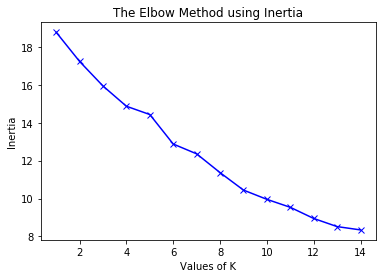

In [76]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

k_values = range(1,15)
SSE = []
Scarborough_grouped_clustering = Scarborough_grouped.drop('Neighborhood', 1)

for k in k_values:
    kclusters = k
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Scarborough_grouped_clustering)
    SSE.append(kmeans.inertia_)

plt.plot(k_values, SSE, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [69]:
kclusters = 9
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Scarborough_grouped_clustering)
kmeans.labels_[0:10]

array([0, 8, 0, 0, 0, 1, 0, 0, 1, 1])

In [72]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Scarborough_merged=df[df['Neighborhood'].isin(Scarborough_grouped['Neighborhood'].tolist())]

Scarborough_merged = Scarborough_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Scarborough_merged = Scarborough_merged.reset_index(drop=True).drop(['PostalCode'],axis=1)

Scarborough_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,Parkwoods,43.728102,-79.311890,0,Pizza Place,Intersection,French Restaurant,Portuguese Restaurant,Park,Coffee Shop,Electronics Store,Elementary School,Ethiopian Restaurant,Falafel Restaurant
1,North York,Victoria Village,43.650964,-79.353041,0,Pub,Café,Athletics & Sports,Theater,Mexican Restaurant,Seafood Restaurant,Food Truck,French Restaurant,Chocolate Shop,Bank
2,Downtown Toronto,"Regent Park, Harbourfront",43.723265,-79.451211,0,Clothing Store,Cosmetics Shop,Furniture / Home Store,Bookstore,American Restaurant,Food Court,Men's Store,Toy / Game Store,Restaurant,Café
3,North York,"Lawrence Manor, Lawrence Heights",43.661790,-79.389390,0,Coffee Shop,Sushi Restaurant,Café,Yoga Studio,Park,Bar,Juice Bar,Bookstore,Fried Chicken Joint,Middle Eastern Restaurant
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.667481,-79.528953,1,Park,Skating Rink,Baseball Field,Fast Food Restaurant,Elementary School,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Women's Store


In [73]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[43.67635739999999, -79.2930312], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Scarborough_merged['Latitude'], Scarborough_merged['Longitude'], Scarborough_merged['Neighborhood'], Scarborough_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [77]:
Scarborough_merged.groupby('Cluster Labels').count()

,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,,,,
0,75,75,75,75,75,75,75,75,75,75,75,75,75,75
1,16,16,16,16,16,16,16,16,16,16,16,16,16,16
2,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [132]:
df_cluster1 = Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 0,Scarborough_merged.columns[[1] + list(range(5, Scarborough_merged.shape[1]))]]
df_cluster1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Parkwoods,Pizza Place,Intersection,French Restaurant,Portuguese Restaurant,Park,Coffee Shop,Electronics Store,Elementary School,Ethiopian Restaurant,Falafel Restaurant
1,Victoria Village,Pub,Café,Athletics & Sports,Theater,Mexican Restaurant,Seafood Restaurant,Food Truck,French Restaurant,Chocolate Shop,Bank
2,"Regent Park, Harbourfront",Clothing Store,Cosmetics Shop,Furniture / Home Store,Bookstore,American Restaurant,Food Court,Men's Store,Toy / Game Store,Restaurant,Café
3,"Lawrence Manor, Lawrence Heights",Coffee Shop,Sushi Restaurant,Café,Yoga Studio,Park,Bar,Juice Bar,Bookstore,Fried Chicken Joint,Middle Eastern Restaurant
6,"Malvern, Rouge",Bank,Athletics & Sports,Burger Joint,Restaurant,Coffee Shop,Electronics Store,Elementary School,Ethiopian Restaurant,Falafel Restaurant,Farm
...,...,...,...,...,...,...,...,...,...,...,...
93,"St. James Town, Cabbagetown",Coffee Shop,Café,Hotel,Restaurant,Gym,American Restaurant,Japanese Restaurant,Deli / Bodega,Asian Restaurant,Steakhouse
95,"The Kingsway, Montgomery Road, Old Mill North",Coffee Shop,Japanese Restaurant,Restaurant,Sushi Restaurant,Café,Pub,Dance Studio,Men's Store,Hotel,Mediterranean Restaurant
96,Church and Wellesley,Coffee Shop,Hotel,Café,Restaurant,Japanese Restaurant,Asian Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Tea Room
98,"Old Mill South, King's Mill Park, Sunnylea, Hu...",Burrito Place,Mattress Store,Thai Restaurant,Coffee Shop,Fish & Chips Shop,Miscellaneous Shop,Burger Joint,Middle Eastern Restaurant,Sushi Restaurant,Bank


In [133]:
df_cluster2 = Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 1,Scarborough_merged.columns[[1] + list(range(5, Scarborough_merged.shape[1]))]]
df_cluster2

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"Queen's Park, Ontario Provincial Government",Park,Skating Rink,Baseball Field,Fast Food Restaurant,Elementary School,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Women's Store
11,"Rouge Hill, Port Union, Highland Creek",Trail,Park,Other Great Outdoors,Athletics & Sports,Farmers Market,Electronics Store,Elementary School,Ethiopian Restaurant,Falafel Restaurant,Farm
14,St. James Town,Hockey Arena,Field,Grocery Store,Park,Trail,Fish & Chips Shop,Fish Market,Fast Food Restaurant,Flower Shop,Donut Shop
19,Berczy Park,Park,Women's Store,Gym,Mexican Restaurant,Beer Store,Bakery,Sporting Goods Shop,Gym Pool,Donut Shop,Flower Shop
25,Cedarbrae,Dog Run,Residential Building (Apartment / Condo),Park,Farmers Market,Electronics Store,Elementary School,Ethiopian Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant
47,"Commerce Court, Victoria Hotel",Park,Bakery,Fast Food Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Women's Store
54,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",Playground,Park,Donut Shop,Food,Flower Shop,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market
61,"Runnymede, The Junction North",Park,Gift Shop,Farmers Market,Pharmacy,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Falafel Restaurant,Farm
63,"Dorset Park, Wexford Heights, Scarborough Town...",Convenience Store,Park,Bank,Construction & Landscaping,Creperie,Electronics Store,Food & Drink Shop,Food,Flower Shop,Fish Market
64,York Mills West,Breakfast Spot,Park,Department Store,Gym / Fitness Center,Food & Drink Shop,Flower Shop,Fish Market,Fish & Chips Shop,Field,Food


In [138]:
df_cluster3 = Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 2,Scarborough_merged.columns[[1] + list(range(5, Scarborough_merged.shape[1]))]]
df_cluster3

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Islington Avenue,Trail,Women's Store,Electronics Store,Elementary School,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Donut Shop
24,Christie,Lounge,Trail,Construction & Landscaping,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Women's Store
37,"Kennedy Park, Ionview, East Birchmount Park",Construction & Landscaping,Trail,Electronics Store,Elementary School,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Donut Shop


In [139]:
df_cluster4 = Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 3,Scarborough_merged.columns[[1] + list(range(5, Scarborough_merged.shape[1]))]]
df_cluster4

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Caledonia-Fairbanks,Coffee Shop,Korean Restaurant,Women's Store,Farmers Market,Electronics Store,Elementary School,Ethiopian Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant


In [140]:
df_cluster5 = Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 4,Scarborough_merged.columns[[1] + list(range(5, Scarborough_merged.shape[1]))]]
df_cluster5

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
82,"Kensington Market, Chinatown, Grange Park",Pharmacy,Women's Store,Eastern European Restaurant,Food & Drink Shop,Food,Flower Shop,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant


In [141]:
df_cluster6 = Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 5,Scarborough_merged.columns[[1] + list(range(5, Scarborough_merged.shape[1]))]]
df_cluster6

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,Westmount,Auto Garage,Women's Store,Fast Food Restaurant,Elementary School,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Field,Eastern European Restaurant


In [142]:
df_cluster7 = Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 6,Scarborough_merged.columns[[1] + list(range(5, Scarborough_merged.shape[1]))]]
df_cluster7

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,"Willowdale, Newtonbrook",Business Service,Women's Store,Food Truck,Food & Drink Shop,Food,Flower Shop,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant


In [145]:
df_cluster8 = Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 7,Scarborough_merged.columns[[1] + list(range(5, Scarborough_merged.shape[1]))]]
df_cluster8

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
94,"First Canadian Place, Underground city",Pool,Women's Store,Donut Shop,Food,Flower Shop,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market


In [146]:
df_cluster9 = Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 8,Scarborough_merged.columns[[1] + list(range(5, Scarborough_merged.shape[1]))]]
df_cluster9

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
91,"Alderwood, Long Branch",Rental Car Location,Women's Store,Donut Shop,Food,Flower Shop,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market


In [78]:
avg_house_prices = [335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0,433500.0,
                                                               435000.0,289500.0,265000.0,285900.0,239400.0,
                                                               589900.0,295000.0,380500.0,378500.0,438500.0,229200.0,
                                                               229200.0,365000.0,388500.,285400.0,493500.0,477500.0,378000.0,316600.0,195000.0,225900.0,219400.0,
                                                               573900.0,367000.0,370500.0,370500.0,363500.0,279200.0,
                                                               279200.0,271000.0,370500.,255400.0,383500.0,433500.0,335000.0,286600.0,185000.0,225900.0,219400.0,
                                                               573900.0,329000.0,370500.0,370500.0,533500.0,279200.0,
                                                               279200.0,375000.0,370500.,255400.0,493500.0,433500.0,335000.0,286600.0,165000.0,225900.0,219400.0,
                                                               573900.0,425000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,195000.0,370500.,255400.0,403500.0,433500.0,335000.0,286600.0,187000.0,225900.0,219400.0,
                                                               573900.0,325000.0,370500.0,370500.0,333500.0,279200.0,
                                                               279200.0,289000.0,370500.,255400.0,413500.0,433500.0,254800.0
                                                              ]

In [87]:
Scarborough_avg_house_price = pd.DataFrame({"Neighborhood":df["Neighborhood"],"Avg_house_price" : avg_house_prices})
Scarborough_avg_house_price.set_index('Neighborhood',inplace=True,drop=True)

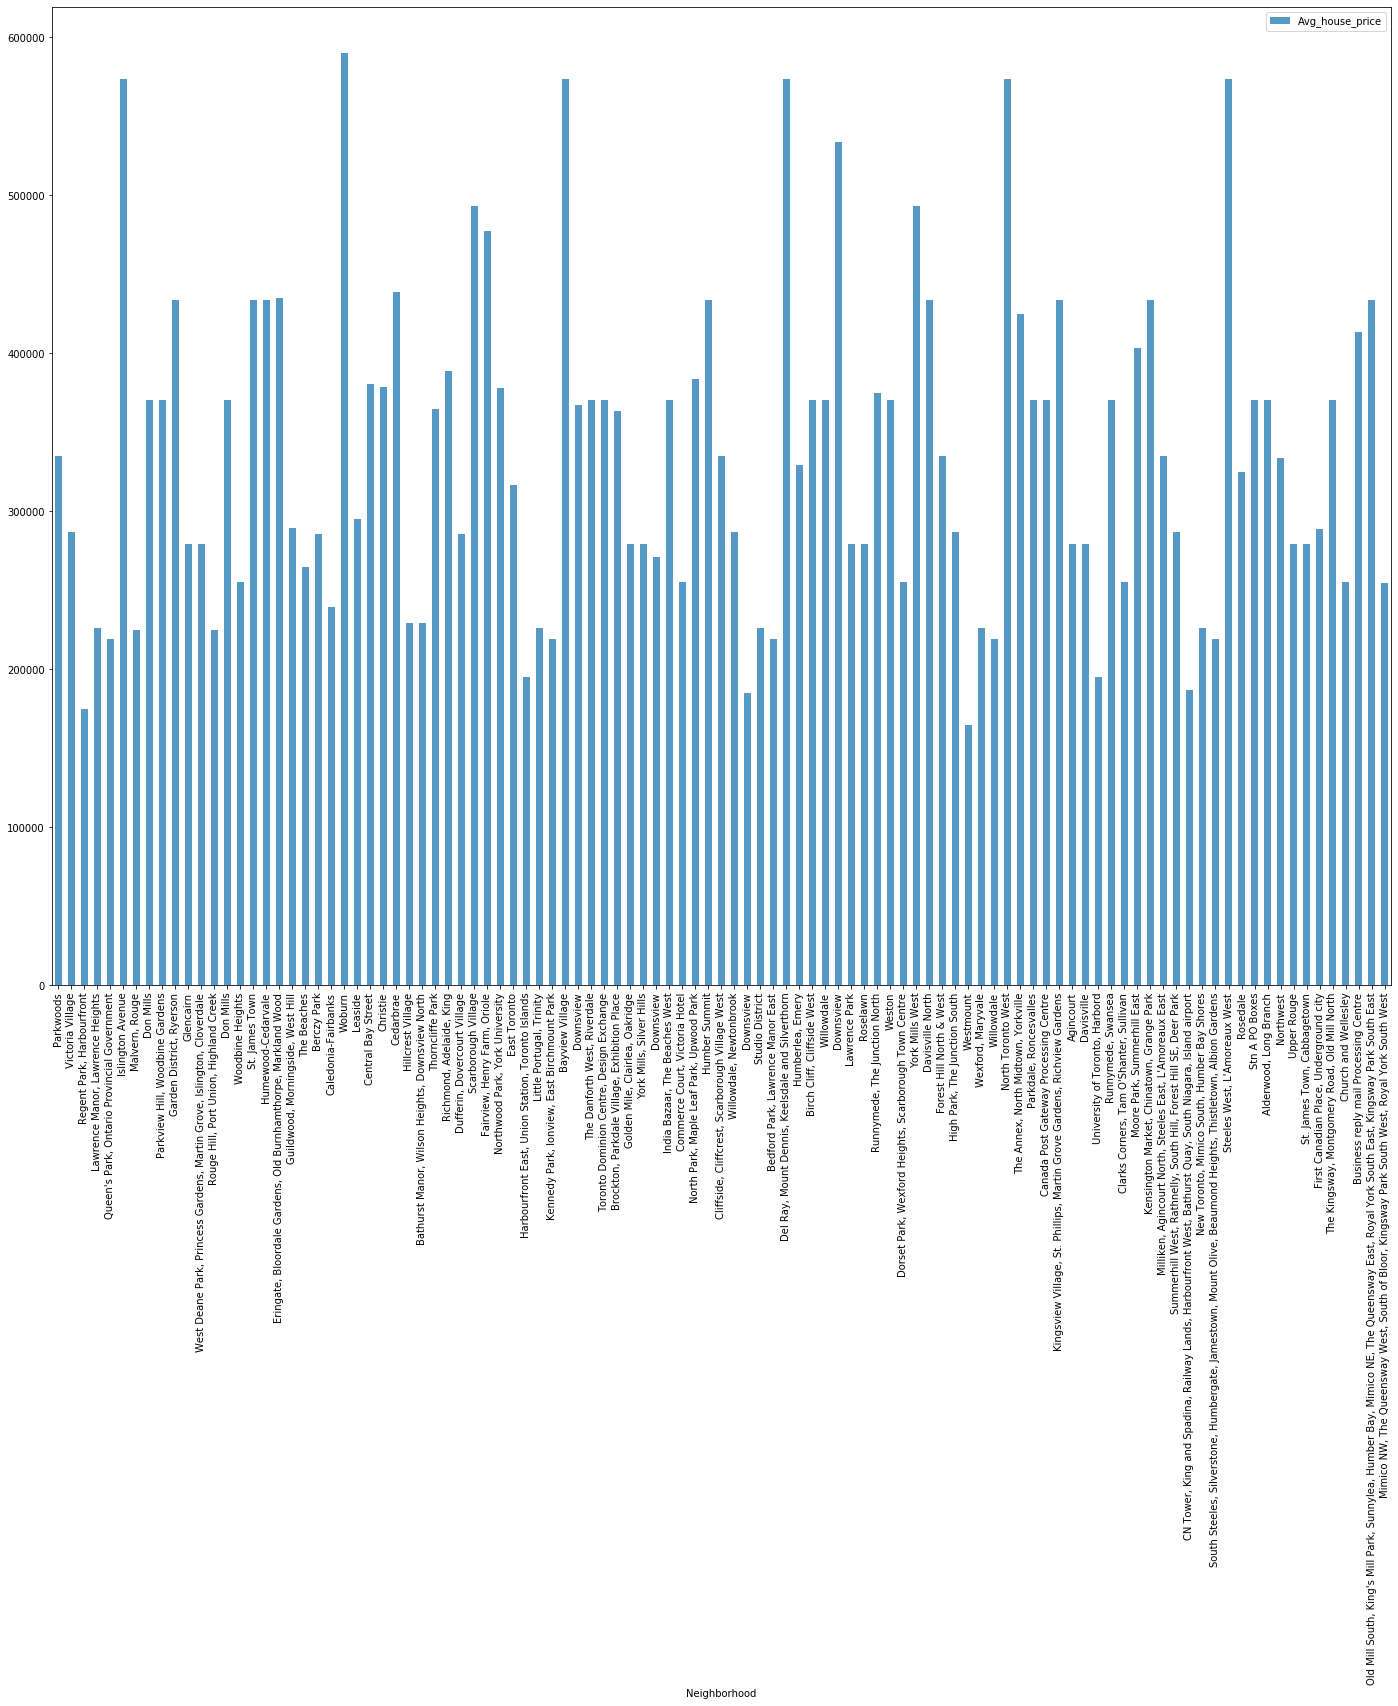

In [88]:
Scarborough_avg_house_price.plot(kind='bar',figsize=(24,18),alpha=0.75)

In [94]:
Scarborough_avg_house_price.describe()

,Avg_house_price
count,103.000000
mean,335430.097087
std,100524.885062
min,165000.000000
25%,255400.000000
50%,333500.000000
75%,379500.000000
max,589900.000000


In [90]:
school_ratings = [7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2,6,
                                                           5,4,8,9,9,6,6,4,5,4,6,8,10,8,9,6,2,
                                                           10,2,5,8,9,6,6,10,8,9,1,2,3,4,5,6,9,
                                                           8,5,9,6,9,6,4,8,10,2,5,6,3,9,8,7,
                                                           7,8,5,8,9,1,5,4,7,2,3,6,6,9,4,8,7,
                                                           4,8,9,2,6,4,7,5,10,4,6,8,9,7,5,6,5,8,7
                                                           ]

In [91]:
Scarborough_school_ratings=pd.DataFrame({"Neighborhood":df["Neighborhood"],"Top School Rating":school_ratings})
Scarborough_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

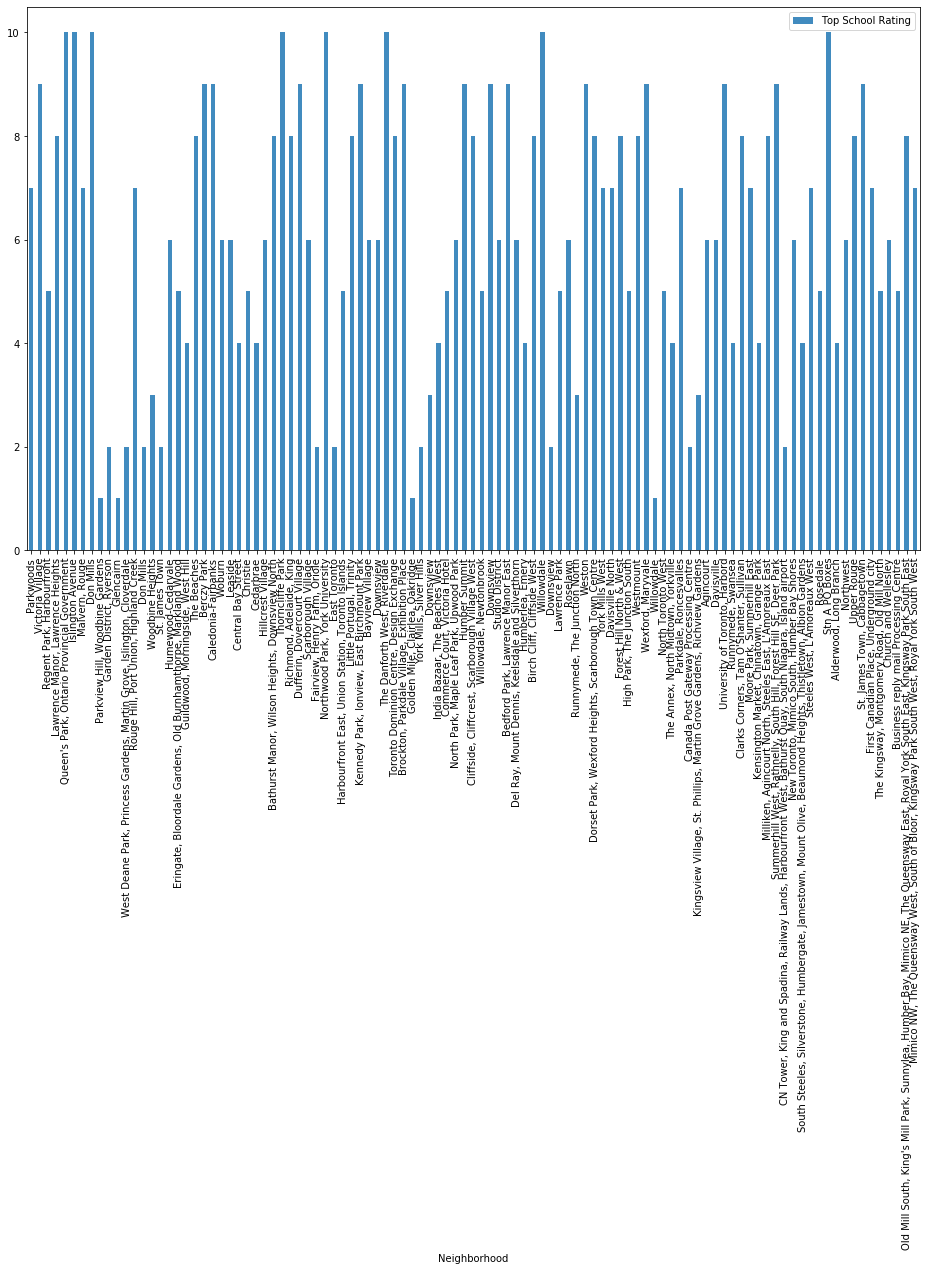

In [93]:
Scarborough_school_ratings.plot(kind='bar',figsize=(16,10),alpha=0.85)

In [95]:
Scarborough_school_ratings.describe()

,Top School Rating
count,103.000000
mean,6.097087
std,2.564901
min,1.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,10.000000


In [134]:
df_cluster1 = pd.merge(df_cluster1,Scarborough_avg_house_price,how = 'left',left_on=['Neighborhood'],right_on=['Neighborhood'])
df_cluster1 = pd.merge(df_cluster1,Scarborough_school_ratings,how = 'left',left_on=['Neighborhood'],right_on=['Neighborhood'])
df_cluster1.describe()

,Avg_house_price,Top School Rating
count,147.000000,147.000000
mean,334582.993197,5.605442
std,108233.120658,2.896757
min,175000.000000,1.000000
25%,268000.000000,3.000000
50%,335000.000000,6.000000
75%,370500.000000,9.000000
max,589900.000000,10.000000


In [135]:
df_cluster2 = pd.merge(df_cluster2,Scarborough_avg_house_price,how = 'left',left_on=['Neighborhood'],right_on=['Neighborhood'])
df_cluster2 = pd.merge(df_cluster2,Scarborough_school_ratings,how = 'left',left_on=['Neighborhood'],right_on=['Neighborhood'])
df_cluster2.describe()

,Avg_house_price,Top School Rating
count,16.000000,16.000000
mean,359612.500000,6.125000
std,125496.857198,2.418677
min,187000.000000,2.000000
25%,255400.000000,4.750000
50%,355000.000000,7.000000
75%,434750.000000,8.000000
max,573900.000000,10.000000


In [147]:
df_cluster3 = pd.merge(df_cluster3,Scarborough_avg_house_price,how = 'left',left_on=['Neighborhood'],right_on=['Neighborhood'])
df_cluster3 = pd.merge(df_cluster3,Scarborough_school_ratings,how = 'left',left_on=['Neighborhood'],right_on=['Neighborhood'])
df_cluster3.describe()

,Avg_house_price,Top School Rating
count,3.000000,3.000000
mean,390600.000000,8.000000
std,177559.482991,2.645751
min,219400.000000,5.000000
25%,298950.000000,7.000000
50%,378500.000000,9.000000
75%,476200.000000,9.500000
max,573900.000000,10.000000


In [149]:
df_cluster4 = pd.merge(df_cluster4,Scarborough_avg_house_price,how = 'left',left_on=['Neighborhood'],right_on=['Neighborhood'])
df_cluster4 = pd.merge(df_cluster4,Scarborough_school_ratings,how = 'left',left_on=['Neighborhood'],right_on=['Neighborhood'])
df_cluster4.describe()

,Avg_house_price,Top School Rating
count,1.0,1.0
mean,239400.0,9.0
std,NaN,NaN
min,239400.0,9.0
25%,239400.0,9.0
50%,239400.0,9.0
75%,239400.0,9.0
max,239400.0,9.0


In [150]:
df_cluster5 = pd.merge(df_cluster5,Scarborough_avg_house_price,how = 'left',left_on=['Neighborhood'],right_on=['Neighborhood'])
df_cluster5 = pd.merge(df_cluster5,Scarborough_school_ratings,how = 'left',left_on=['Neighborhood'],right_on=['Neighborhood'])
df_cluster5.describe()

,Avg_house_price,Top School Rating
count,1.0,1.0
mean,433500.0,4.0
std,NaN,NaN
min,433500.0,4.0
25%,433500.0,4.0
50%,433500.0,4.0
75%,433500.0,4.0
max,433500.0,4.0


In [151]:
df_cluster6 = pd.merge(df_cluster6,Scarborough_avg_house_price,how = 'left',left_on=['Neighborhood'],right_on=['Neighborhood'])
df_cluster6 = pd.merge(df_cluster6,Scarborough_school_ratings,how = 'left',left_on=['Neighborhood'],right_on=['Neighborhood'])
df_cluster6.describe()

,Avg_house_price,Top School Rating
count,1.0,1.0
mean,165000.0,8.0
std,NaN,NaN
min,165000.0,8.0
25%,165000.0,8.0
50%,165000.0,8.0
75%,165000.0,8.0
max,165000.0,8.0


In [152]:
df_cluster7 = pd.merge(df_cluster7,Scarborough_avg_house_price,how = 'left',left_on=['Neighborhood'],right_on=['Neighborhood'])
df_cluster7 = pd.merge(df_cluster7,Scarborough_school_ratings,how = 'left',left_on=['Neighborhood'],right_on=['Neighborhood'])
df_cluster7.describe()

,Avg_house_price,Top School Rating
count,1.0,1.0
mean,286600.0,5.0
std,NaN,NaN
min,286600.0,5.0
25%,286600.0,5.0
50%,286600.0,5.0
75%,286600.0,5.0
max,286600.0,5.0


In [153]:
df_cluster8 = pd.merge(df_cluster8,Scarborough_avg_house_price,how = 'left',left_on=['Neighborhood'],right_on=['Neighborhood'])
df_cluster8 = pd.merge(df_cluster8,Scarborough_school_ratings,how = 'left',left_on=['Neighborhood'],right_on=['Neighborhood'])
df_cluster8.describe()

,Avg_house_price,Top School Rating
count,1.0,1.0
mean,289000.0,7.0
std,NaN,NaN
min,289000.0,7.0
25%,289000.0,7.0
50%,289000.0,7.0
75%,289000.0,7.0
max,289000.0,7.0


In [154]:
df_cluster9 = pd.merge(df_cluster9,Scarborough_avg_house_price,how = 'left',left_on=['Neighborhood'],right_on=['Neighborhood'])
df_cluster9 = pd.merge(df_cluster9,Scarborough_school_ratings,how = 'left',left_on=['Neighborhood'],right_on=['Neighborhood'])
df_cluster9.describe()

,Avg_house_price,Top School Rating
count,1.0,1.0
mean,370500.0,4.0
std,NaN,NaN
min,370500.0,4.0
25%,370500.0,4.0
50%,370500.0,4.0
75%,370500.0,4.0
max,370500.0,4.0
